### question 10 : sur la spécialisation des pays. 


Le but est d'identifier différents profils de pays :

- ceux qui sont très spécialisés (ie qui ont gagné leurs médailles dans peu de sport différents)
- ceux qui sont plus équilibrés (ie qui ont gagné leurs médailles dans beaucoup de sports différents)


Pour cela on va créer un **ratio de spécialisation**, calculé pour chaque pays comme étant le rapport entre le nombre de médailles obtenues dans le sport le plus représenté et le nombre total de médailles.
Ainsi, un fort ratio indique une forte spécialisation.

In [3]:
# on importe le package
import pandas as pd

# on charge les données
athletes = pd.read_csv('athlete_events.csv')
noc = pd.read_csv('noc_regions.csv')

# fusion des deux tableaux
data = pd.merge(athletes, noc, how='left', on='NOC')

# on ne garde que les places avec médailles
data_medals = data.dropna(subset = ['Medal'])

# on calcule le nombre de médailles par sport, par pays
grouped = data_medals.groupby(['NOC','Sport']).size().reset_index(name='podium_count')

# on sélectionne le sport avec le plus de médailles pour chaque pays
max_podium = grouped.groupby('NOC')['podium_count'].max().reset_index(name="max_podium")

# on calcule le nombre total de médailles par pays
total_podium = grouped.groupby('NOC')['podium_count'].sum().reset_index(name='total_podium')

#on fusionne dans un tableau
specialisation = pd.merge(max_podium, total_podium, on='NOC')
specialisation = specialisation.merge(noc[['NOC','region']], on='NOC', how='left')

# on calcule le ratio de spécialisation de chaque pays. 
specialisation['ratio_specialisation'] = specialisation['max_podium'] / specialisation['total_podium']

# Réorganiser pour placer le nom du pays en première colonne et renommer si besoin
specialisation = specialisation[['region', 'max_podium', 'total_podium', 'ratio_specialisation']]
specialisation.rename(columns={'region': 'Country'}, inplace=True)

In [4]:
print(specialisation.columns)
# ['Country', 'max_podium', 'total_podium', 'ratio_specialisation']

Index(['Country', 'max_podium', 'total_podium', 'ratio_specialisation'], dtype='object')


In [5]:
print(specialisation)

         Country  max_podium  total_podium  ratio_specialisation
0    Afghanistan           2             2              1.000000
1        Curacao           1             1              1.000000
2        Algeria           9            17              0.529412
3      Australia          15            29              0.517241
4      Argentina          81           274              0.295620
..           ...         ...           ...                   ...
144      Vietnam           2             4              0.500000
145     Trinidad           5             5              1.000000
146       Serbia          84           390              0.215385
147       Zambia           1             2              0.500000
148     Zimbabwe          15            22              0.681818

[149 rows x 4 columns]


In [6]:
#ces réglages permettent d'afficher toutes les lignes des tableaux (pour chercher des valeurs pertinentes)
# si on veut afficher le tableau complet, on enlèvera le .head()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Pays avec le plus faible taux de spécialisation (remarques en bas du tableau)
spe_asc = specialisation.sort_values(by='ratio_specialisation', ascending = True).head(20)
spe_asc

,Country,max_podium,total_podium,ratio_specialisation
112,Russia,103,1165,0.088412
40,Russia,30,279,0.107527
49,Germany,236,2165,0.109007
22,China,109,989,0.110212
139,Russia,288,2503,0.115062
12,Belgium,54,468,0.115385
138,Ukraine,23,199,0.115578
44,Germany,71,586,0.121160
120,Switzerland,92,691,0.133140
123,Sweden,217,1536,0.141276


In [7]:
# afficher le ratio de spécialisation des pays avec le plus de médailles.

tab2 = specialisation.sort_values(by='total_podium', ascending = False).head(15)
tab2

#rq : pour voir le tableau en entier, il suffit d'enlever .head()

,Country,max_podium,total_podium,ratio_specialisation
141,USA,1080,5637,0.191591
139,Russia,288,2503,0.115062
49,Germany,236,2165,0.109007
46,UK,338,2068,0.163443
43,France,310,1777,0.174451
67,Italy,359,1637,0.219304
123,Sweden,217,1536,0.141276
20,Canada,348,1352,0.257396
6,Australia,401,1320,0.303788
112,Russia,103,1165,0.088412


### 🔭 Observations

1) souvent, un taux de spécialisation proche de 1 signifie que le pays a gagné une ou peu de médailles. 

2) cependant, certains pays ont un très fort taux de spécialisation tout en ayant gagné beaucoup de médailles. C'est le cas de la Jamaïque . Cela montre leur domination dans un sport particulier. 

* L'Éthiopie a 53 médailles, toutes dans un seul sport
* La Jamaïque a 157 médailles au total donc 156 dans un seul sport

3) Il serait intéressant ensuite d'identifier quels sont ces sports dans lesquels ces pays sont très spécialisés. 


### 📝 Remarques

1) le ratio de spécialisation en lui-même ne dit pas tout puisqu'un pays peu avoir un faible taux de spécilisation mais peu de médailles. 

2) Ainsi on pourrait créer un indicateur de performance général qui valoriserait à la fois le nombre de médailles gagnées ET le fait d'être peu spécialisé. 

3) performance = {nombre total de médailles gagnées} x [1 - ratio_specialisation]

4) Un pays avec beaucoup de médailles et un faible ratio aura un score élevé. Un pays avec beaucoup de médailles mais un ratio de spécialisation élevé aura un score moyen. 

### 🦺 Piste d'approfondissement

(en cours)
afficher sur une carte choroplèthe le ratio de spécialisation de chaque pays, en utilisant géopandas et potentiellement d'autres packages
   
intuitions (après les premières observations): 
- l'Europe aura probablement un ratio de spécialisation plus faible
- l'Afrique aura un ratio de spécialisation plus élevé (dans la course, l'athlétisme)

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# URL NACIS CDN pour le shapefile 110 m Admin 0 – Countries
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

# GeoPandas sait lire directement dans un ZIP distant
world = gpd.read_file(url)  #  [oai_citation_attribution:0‡Stack Overflow](https://stackoverflow.com/questions/76548222/how-to-get-maps-to-geopandas-after-datasets-are-removed?utm_source=chatgpt.com)

In [9]:
print(specialisation.columns)
# ['Country', 'max_podium', 'total_podium', 'ratio_specialisation']

Index(['Country', 'max_podium', 'total_podium', 'ratio_specialisation'], dtype='object')


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)

In [24]:
world.head(10)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

In [12]:
print(world.columns)       # pour repérer 'name' ou 'ADMIN'

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [13]:
print(world['ADMIN'])  # ou world['ADMIN'].head()

0                                     Fiji
1              United Republic of Tanzania
2                           Western Sahara
3                                   Canada
4                 United States of America
5                               Kazakhstan
6                               Uzbekistan
7                         Papua New Guinea
8                                Indonesia
9                                Argentina
10                                   Chile
11        Democratic Republic of the Congo
12                                 Somalia
13                                   Kenya
14                                   Sudan
15                                    Chad
16                                   Haiti
17                      Dominican Republic
18                                  Russia
19                             The Bahamas
20                        Falkland Islands
21                                  Norway
22                               Greenland
23     Fren

In [14]:
merged = world.merge(specialisation, 
left_on='ADMIN',
right_on='Country',
how='left')

In [25]:
merged.head(5)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Country,max_podium,total_podium,ratio_specialisation
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,13.0,13.0,1.000000
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",NaN,NaN,NaN,NaN
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin

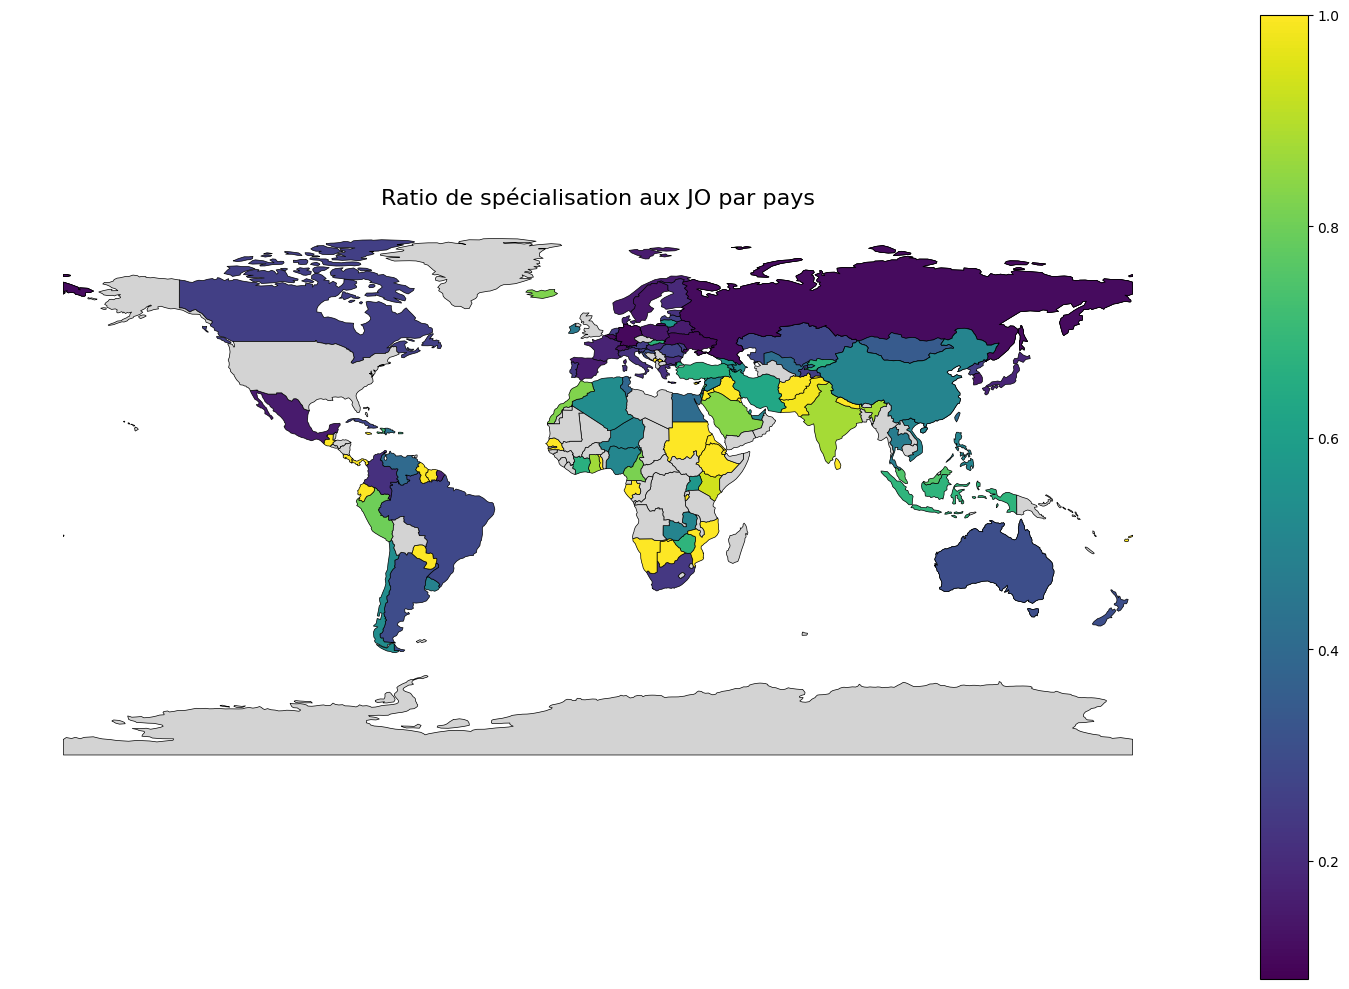

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
merged.plot(
    column='ratio_specialisation',
    legend=True,
    linewidth=0.5,
    edgecolor='black',
    missing_kwds={"color":"lightgrey","label":"Pas de médailles"},
    ax=ax
)
ax.set_title("Ratio de spécialisation aux JO par pays", fontsize=16)
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [17]:
world_names = set(world['ADMIN'].dropna().astype(str))
world_names

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French Southern and Antarctic Lands',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',


In [18]:
spec_names = set(specialisation['Country'].dropna().astype(str))
spec_names

{'Afghanistan',
 'Algeria',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Bermuda',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burundi',
 'Cameroon',
 'Canada',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Haiti',
 'Hungary',
 'Iceland',
 'India',
 'Individual Olympic Athletes',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kosovo',
 'Kuwait',
 'Kyrgyzstan',
 'Latvia',
 'Lebanon',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macedonia',
 'Malaysia',
 'Mauritius',
 'Mexico',
 'Moldova',
 'Monaco',
 'Mongolia',
 'Monte

In [19]:
diff_spec_not_world = sorted(spec_names - world_names)
print("Dans specialisation mais pas dans world:", diff_spec_not_world)

Dans specialisation mais pas dans world: ['Bahamas', 'Bahrain', 'Barbados', 'Bermuda', 'Curacao', 'Czech Republic', 'Grenada', 'Individual Olympic Athletes', 'Liechtenstein', 'Macedonia', 'Mauritius', 'Monaco', 'Serbia', 'Tanzania', 'Tonga', 'Trinidad', 'UK', 'USA', 'Virgin Islands, US']


In [20]:
diff_world_not_spec = sorted(world_names - spec_names)
print("Présents dans world mais pas dans specialisation :", diff_world_not_spec)

Présents dans world mais pas dans specialisation : ['Albania', 'Angola', 'Antarctica', 'Bangladesh', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brunei', 'Burkina Faso', 'Cambodia', 'Central African Republic', 'Chad', 'Czechia', 'Democratic Republic of the Congo', 'East Timor', 'El Salvador', 'Equatorial Guinea', 'Falkland Islands', 'French Southern and Antarctic Lands', 'Gambia', 'Greenland', 'Guinea', 'Guinea-Bissau', 'Honduras', 'Laos', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Myanmar', 'New Caledonia', 'Nicaragua', 'North Macedonia', 'Northern Cyprus', 'Oman', 'Palestine', 'Papua New Guinea', 'Republic of Serbia', 'Republic of the Congo', 'Rwanda', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'Somaliland', 'South Sudan', 'The Bahamas', 'Trinidad and Tobago', 'Turkmenistan', 'United Kingdom', 'United Republic of Tanzania', 'United States of America', 'Vanuatu', 'Western Sahara', 'Yemen', 'eSwatini']


In [21]:
diff_spec_not_world

['Bahamas',
 'Bahrain',
 'Barbados',
 'Bermuda',
 'Curacao',
 'Czech Republic',
 'Grenada',
 'Individual Olympic Athletes',
 'Liechtenstein',
 'Macedonia',
 'Mauritius',
 'Monaco',
 'Serbia',
 'Tanzania',
 'Tonga',
 'Trinidad',
 'UK',
 'USA',
 'Virgin Islands, US']

In [22]:
import pandas as pd 
regions_no_medal = pd.read_csv('regions_sans_medaille.csv')['region'].tolist()

In [26]:
filtered_list = [elem for elem in diff_world_not_spec if elem not in regions_no_medal]

j'aimerais prendre la liste diff_world_not_spec et y retirer les éléments qui sont présents dans region_sans_medaille.csv' 

In [27]:
filtered_list

['Antarctica',
 'Bolivia',
 'Czechia',
 'East Timor',
 'Falkland Islands',
 'French Southern and Antarctic Lands',
 'Greenland',
 'New Caledonia',
 'North Macedonia',
 'Northern Cyprus',
 'Republic of Serbia',
 'Republic of the Congo',
 'Somaliland',
 'The Bahamas',
 'Trinidad and Tobago',
 'United Kingdom',
 'United Republic of Tanzania',
 'United States of America',
 'Western Sahara',
 'eSwatini']

In [28]:
diff_world_not_spec

['Albania',
 'Angola',
 'Antarctica',
 'Bangladesh',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brunei',
 'Burkina Faso',
 'Cambodia',
 'Central African Republic',
 'Chad',
 'Czechia',
 'Democratic Republic of the Congo',
 'East Timor',
 'El Salvador',
 'Equatorial Guinea',
 'Falkland Islands',
 'French Southern and Antarctic Lands',
 'Gambia',
 'Greenland',
 'Guinea',
 'Guinea-Bissau',
 'Honduras',
 'Laos',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Myanmar',
 'New Caledonia',
 'Nicaragua',
 'North Macedonia',
 'Northern Cyprus',
 'Oman',
 'Palestine',
 'Papua New Guinea',
 'Republic of Serbia',
 'Republic of the Congo',
 'Rwanda',
 'Sierra Leone',
 'Solomon Islands',
 'Somalia',
 'Somaliland',
 'South Sudan',
 'The Bahamas',
 'Trinidad and Tobago',
 'Turkmenistan',
 'United Kingdom',
 'United Republic of Tanzania',
 'United States of America',
 'Vanuatu',
 'Western Sahara',
 'Yemen',
 'eSwatini']

In [30]:
import difflib
import pandas as pd

# ta liste « specialization »
special = set(diff_world_not_spec)

# les noms dans ton GeoDataFrame world
world_names = set(world['ADMIN'].tolist())

# ceux de ta liste qui n’apparaissent pas dans world
unmatched = sorted(special - world_names)

print("Non appariés :", unmatched)

# Pour chaque non-apparié, proposer des correspondances
for name in unmatched:
    suggestions = difflib.get_close_matches(name, world_names, n=3, cutoff=0.5)
    print(f"{name!r} → {suggestions}")


Non appariés : []
